[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.

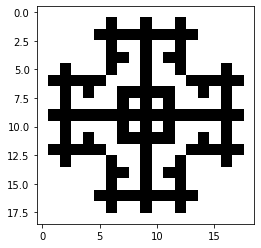

In [261]:
import numpy as np 
import matplotlib.pyplot as plt 
from queue import Queue 
import sys
sys.path.append('../')

env=np.loadtxt('map.txt',dtype=str)
B=2,12
A=6,2
G=9,9

env[A]= 1
env[B]= 1
env[G]= 1

env=np.array(env,dtype=float)
print(env)
plt.imshow(env, cmap=plt.cm.binary)
plt.show()

###BFS ALGORITHM### 
    
def BFS(env): 
    solved=False
    
    ai,aj=6,2
    bi,bj=2,12
    gi,gj=9,9

    #env_final=np.copy(env)
    
    #keeps track of total steps take. 
    steps=0
    
    #keeps track of previous steps 
    prevB={}
    prevA={}
   
    #intitialize queues 
    fringeB=queue.Queue() 
    fringeB.put((bi,bj,steps))
    
    fringeA=queue.Queue() 
    fringeA.put((ai,aj,steps))
    
        
    
    #print(list(fringeA.queue))
    #print(list(fringeB.queue))
      
    while solved==False: 
                
        currentB=fringeB.get()
        currentA=fringeA.get()
        
        
        bi,bj,steps=currentB[0],currentB[1],currentB[2]
        ai,aj,steps=currentA[0],currentA[1],currentA[2]
       
        #print('a',ai,aj,'b',bi,bj,'s',steps)
        #print(Queue.qsize(fringeA))
        #print(Queue.qsize(fringeB))
        #print()
    
    
        #check if A and B have overlapped  
        if (bi==ai and bj==aj):

            print('SOLVED')
            solved=True
            
            #reconstruct path 
            while ai!=6 or aj!=2 or bi!=2 or bj!=12: 
                env[ai,aj]=5
                env[bi,bj]=5
                
                x=prevA[ai,aj,steps]
                y=prevB[bi,bj,steps]
                ai=x[0]
                aj=x[1]
                steps=x[2]

                
                bi=y[0]
                bj=y[1]
                steps=y[2]
                
                print('a',x)
                print('b',y)
                print()
                
            break
         
        
        
        #check DOWN position 
        #are we outisde? 
        if env[ai+1][aj]==0 and env[bi+1][bj]==0:
            #skip this step, nowhere to go 
            pass
                
        elif env[ai+1][aj]==1 and env[bi+1][bj]==1:
            #check if in fringe
            if [ai + 1, aj,steps+1] in fringeA.queue and [bi + 1, bj,steps+1] in fringeB.queue:
                pass
            #add both to fringe
            else:
                prevB[(bi + 1, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi + 1, bj,steps+1])
                
                prevA[(ai + 1, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai + 1, aj,steps+1])       

        elif env[ai+1][aj]==1 and env[bi+1][bj]==0:
            #check if in fringe
            if [ai + 1, aj,steps+1] in fringeA.queue and [bi, bj,steps+1] in fringeB.queue:
                pass
            #add a to fringe
            else:   
                prevB[(bi, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj,steps+1])
                
                prevA[(ai + 1, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai + 1, aj,steps+1])               
                
        elif env[ai+1][aj]==0 and env[bi+1][bj]==1:
            #check if in fringe
            if [ai, aj,steps+1] in fringeA.queue and [bi + 1, bj,steps+1] in fringeB.queue:
                pass
            #add b to fringe
            else:
                prevB[(bi + 1, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi + 1, bj,steps+1])
                
                prevA[(ai, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj,steps+1])
                        
                                                                  
        #check RIGHT position 
        #are we outisde? 
        if env[ai][aj+1]==0 and env[bi][bj+1]==0:
            #skip this step, nowhere to go 
            pass
                
        elif env[ai][aj+1]==1 and env[bi][bj+1]==1:
            #check if in fringe
            if [ai, aj+1,steps+1] in fringeA.queue and [bi, bj+1,steps+1] in fringeB.queue:
                pass
            #add both to fringe
            else:
                prevB[(bi, bj+1,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj+1,steps+1])
                
                prevA[(ai, aj+1,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj+1,steps+1])
                              

        elif env[ai][aj+1]==1 and env[bi][bj+1]==0:
            #check if in fringe
            if [ai, aj+1,steps+1] in fringeA.queue and [bi, bj,steps+1] in fringeB.queue:
                pass
            #add a to fringe
            else:
                prevB[(bi, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj,steps+1])
                
                prevA[(ai, aj+1,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj+1,steps+1])
                              
                
        elif env[ai][aj+1]==0 and env[bi][bj+1]==1:
            #check if in fringe
            if [ai, aj,steps+1] in fringeA.queue and [bi, bj+1,steps+1] in fringeB.queue:
                pass
            #add b to fringe
            else:
                prevB[(bi, bj+1,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj+1,steps+1])
                
                prevA[(ai, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj,steps+1])
                        
                           
       #check UP solution      
       #are we outisde? 
        if env[ai-1][aj]==0 and env[bi-1][bj]==0:
            #skip this step, nowhere to go 
            pass
                
        elif env[ai-1][aj]==1 and env[bi-1][bj]==1:
            #check if in fringe
            if [ai - 1, aj,steps+1] in fringeA.queue and [bi - 1, bj,steps+1] in fringeB.queue:
                pass
            #add both to fringe
            else:
                prevB[(bi - 1, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi - 1, bj,steps+1])
                
                prevA[(ai - 1, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai - 1, aj,steps+1])
                
        elif env[ai-1][aj]==1 and env[bi-1][bj]==0:
            #check if in fringe
            if [ai - 1, aj,steps+1] in fringeA.queue and [bi, bj,steps+1] in fringeB.queue:
                pass
            #add a to fringe
            else:
                prevB[(bi, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj,steps+1])
                
                prevA[(ai - 1, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai - 1, aj,steps+1])
                             
        elif env[ai-1][aj]==0 and env[bi-1][bj]==1:
            #check if in fringe
            if [ai, aj,steps+1] in fringeA.queue and [bi - 1, bj,steps+1] in fringeB.queue:
                pass
            #add b to fringe
            else:
                prevB[(bi - 1, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi - 1, bj,steps+1])
                
                prevA[(ai, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj,steps+1])
                
                         
       #check LEFT solution 
       #are we outisde? 
        if env[ai][aj-1]==0 and env[bi][bj-1]==0:
            #skip this step, nowhere to go 
            pass
                
        elif env[ai][aj-1]==1 and env[bi][bj-1]==1:
            #check if in fringe
            if [ai, aj-1,steps+1] in fringeA.queue and [bi, bj-1,steps+1] in fringeB.queue:
                pass
            #add both to fringe
            else:
                prevB[(bi, bj-1,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj-1,steps+1])
                
                prevA[(ai, aj-1,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj-1,steps+1])
                
        elif env[ai][aj-1]==1 and env[bi][bj-1]==0:
            #check if in fringe
            if [ai, aj-1,steps+1] in fringeA.queue and [bi, bj,steps+1] in fringeB.queue:
                pass
            #add a to fringe
            else:
                prevB[(bi, bj,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj,steps+1])
                
                prevA[(ai, aj-1,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj-1,steps+1])
                      
        elif env[ai][aj-1]==0 and env[bi][bj-1]==1:
            #check if in fringe
            if [ai, aj,steps+1] in fringeA.queue and [bi, bj-1,steps+1] in fringeB.queue:
                pass
            #add b to fringe
            else:
                prevB[(bi, bj-1,steps+1)] = (bi, bj,steps)
                fringeB.put([bi, bj-1,steps+1])
                
                prevA[(ai, aj,steps+1)] = (ai, aj,steps)
                fringeA.put([ai, aj,steps+1])
                
                
            
    return solved                              
    

In [262]:
#visited coordiantes 
solved=BFS(env)
print('solved',solved)

SOLVED
a (2, 12, 20)
b (1, 12, 20)

a (2, 11, 19)
b (1, 12, 19)

a (2, 10, 18)
b (1, 12, 18)

a (2, 9, 17)
b (1, 12, 17)

a (3, 9, 16)
b (1, 12, 16)

a (4, 9, 15)
b (1, 12, 15)

a (5, 9, 14)
b (1, 12, 14)

a (6, 9, 13)
b (2, 12, 13)

a (7, 9, 12)
b (3, 12, 12)

a (8, 9, 11)
b (4, 12, 11)

a (9, 9, 10)
b (4, 12, 10)

a (9, 8, 9)
b (4, 12, 9)

a (9, 7, 8)
b (4, 12, 8)

a (9, 6, 7)
b (4, 12, 7)

a (9, 5, 6)
b (4, 12, 6)

a (9, 4, 5)
b (4, 11, 5)

a (9, 3, 4)
b (4, 11, 4)

a (9, 2, 3)
b (4, 11, 3)

a (8, 2, 2)
b (4, 12, 2)

a (7, 2, 1)
b (3, 12, 1)

a (6, 2, 0)
b (2, 12, 0)

solved True


In [263]:
#five indicates path taken by agent 
print(env)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 5. 5. 5. 5. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 5. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 5. 0. 5. 5. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 5. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 5. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 5. 0. 1. 0. 0. 1. 1. 5. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 5. 0. 0. 0. 0. 1. 0. 5. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 5. 5. 5. 5. 5. 5. 5. 5. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.